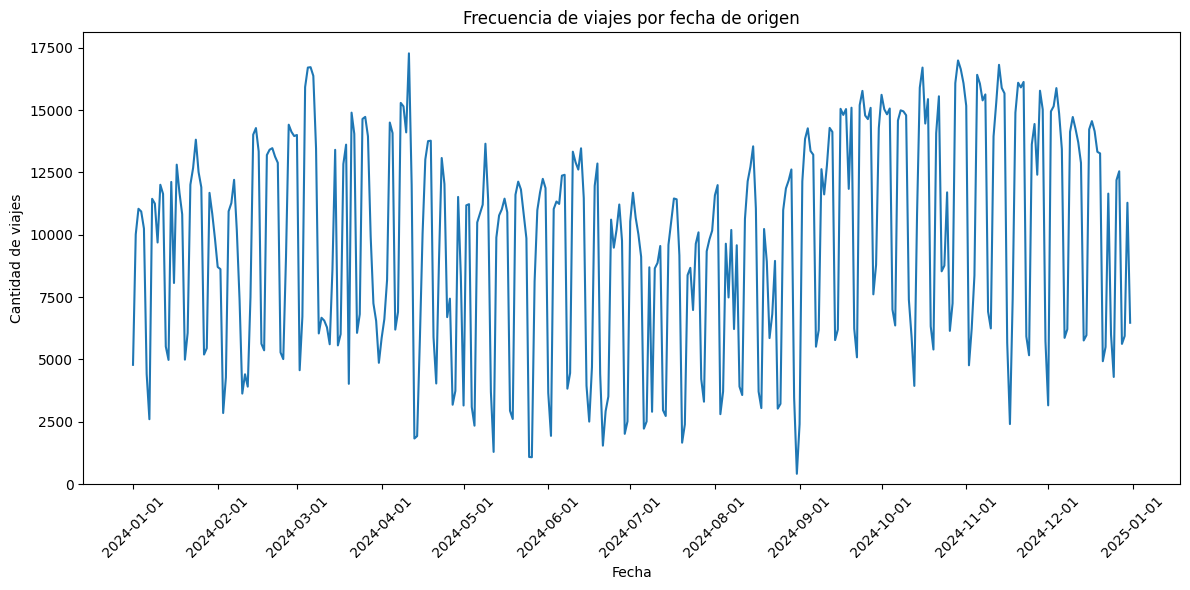

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

route_df = pd.read_csv(r".\recorridos.csv")
#user_df = pd.read_csv(r".\usuarios.csv")

# Agrupar por fecha (por día) y contar
route_df['fecha_origen_recorrido'] = pd.to_datetime(route_df['fecha_origen_recorrido'])
frecuencia_fechas = route_df['fecha_origen_recorrido'].dt.date.value_counts().sort_index()
frecuencia_fechas = frecuencia_fechas.sort_index()

# --- Gráfico de líneas con solo el primer día del mes en el eje X ---
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_fechas.index, frecuencia_fechas.values, linestyle='-')
plt.title('Frecuencia de viajes por fecha de origen')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.xticks(rotation=45)

# Formatear eje X para mostrar solo el primer día de cada mes
locator = mdates.MonthLocator(bymonthday=1)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [18]:
df_frecuencia = frecuencia_fechas.reset_index()
df_frecuencia.columns = ['fecha_origen_recorrido', 'count']
df_frecuencia['fecha_origen_recorrido'] = pd.to_datetime(df_frecuencia['fecha_origen_recorrido'])
df_frecuencia['semana_iso'] = df_frecuencia['fecha_origen_recorrido'].dt.isocalendar().week
df_frecuencia

,fecha_origen_recorrido,count,semana_iso
0,2024-01-01,4787,1
1,2024-01-02,10017,1
2,2024-01-03,11045,1
3,2024-01-04,10936,1
4,2024-01-05,10253,1
...,...,...,...
361,2024-12-27,12548,52
362,2024-12-28,5625,52
363,2024-12-29,5943,52
364,2024-12-30,11286,1


| Fecha del Aumento | Semana ISO | Fuente                                                                 |
|-------------------|------------|------------------------------------------------------------------------|
| 15-01-2024        | Semana 3   | [La Nación](https://www.lanacion.com.ar/economia/ya-rige-el-aumento-en-el-boleto-de-colectivo-cuanto-cuesta-ahora-nid15012024/)  |
| 01-02-2024        | Semana 5   | [Ámbito](https://www.ambito.com/economia/colectivos/aumentan-los-boletos-cuanto-sale-el-pasaje-febrero-n5882846)              |
| 01-03-2024        | Semana 9   | [Página/12](https://www.pagina12.com.ar/728392-caba-nuevo-aumento-en-el-boleto-de-colectivo-desde-marzo)                        |
| 01-04-2024        | Semana 14  | [BAENegocios](https://www.baenegocios.com/economia/Aumenta-el-boleto-de-colectivo-en-CABA-desde-abril-20240401-0034.html)     |
| 01-05-2024        | Semana 18  | [Infobae](https://www.infobae.com/economia/2024/04/30/aumenta-el-boleto-de-colectivo-en-caba-desde-mayo/)                     |
| 12-08-2024        | Semana 33  | [Clarín](https://www.clarin.com/economia/subte-colectivos-caba-nuevas-tarifas-agosto-2024_0_OZoxLwVJlX.html)                   |

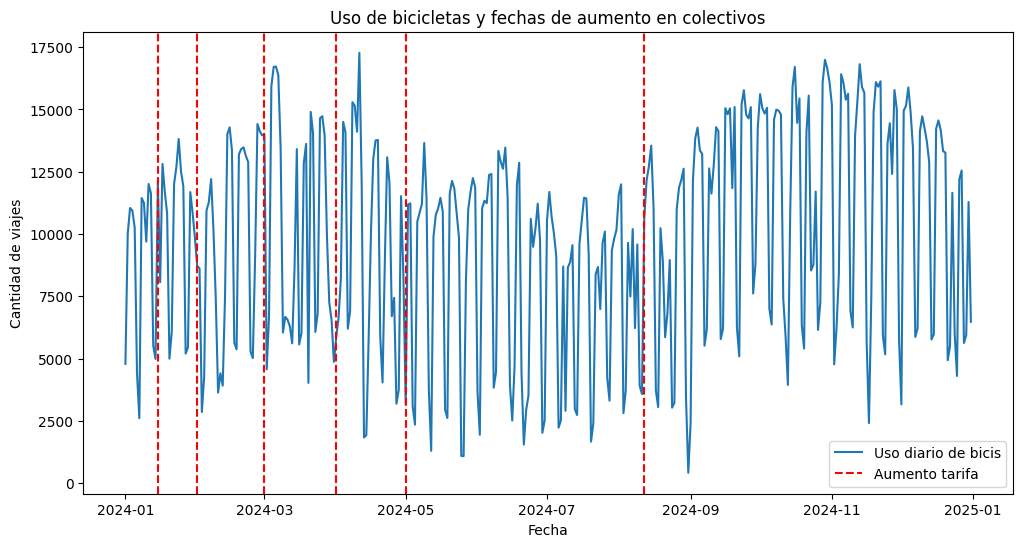

In [37]:
fechas_aumento = ['15-01-2024', '01-02-2024', '01-03-2024', '01-04-2024', '01-05-2024', '12-08-2024']
fechas_aumento_series = pd.to_datetime(pd.Series(fechas_aumento), format='%d-%m-%Y')

plt.figure(figsize=(12, 6))
plt.plot(df_frecuencia['fecha_origen_recorrido'], df_frecuencia['count'], label='Uso diario de bicis')
for i, fecha in enumerate(fechas_aumento):
    if i == 0:
        plt.axvline(pd.to_datetime(fecha, dayfirst=True), color='red', linestyle='--', label='Aumento tarifa')
    else:
        plt.axvline(pd.to_datetime(fecha, dayfirst=True), color='red', linestyle='--')
plt.title('Uso de bicicletas y fechas de aumento en colectivos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')
plt.legend()
plt.show()

0     3
1     5
2     9
3    14
4    18
5    33
Name: week, dtype: UInt32
[np.uint32(3), np.uint32(4), np.uint32(5), np.uint32(6), np.uint32(9), np.uint32(10), np.uint32(14), np.uint32(15), np.uint32(18), np.uint32(19), np.uint32(33), np.uint32(34)]

Semana 3 (actual): 9512 viajes
Semana 4 (posterior): 10512 viajes
Aumento porcentual en semana 3: 10.519359586675066

Semana 5 (actual): 8122 viajes
Semana 6 (posterior): 8578 viajes
Aumento porcentual en semana 5: 5.612523085040897

Semana 9 (actual): 10986 viajes
Semana 10 (posterior): 13131 viajes
Aumento porcentual en semana 9: 19.524342036825136

Semana 14 (actual): 8908 viajes
Semana 15 (posterior): 11084 viajes
Aumento porcentual en semana 14: 24.43667505974049

Semana 18 (actual): 7267 viajes
Semana 19 (posterior): 8946 viajes
Aumento porcentual en semana 18: 23.100513082624

Semana 33 (actual): 9554 viajes
Semana 34 (posterior): 6720 viajes
Aumento porcentual en semana 33: -29.66313302731717


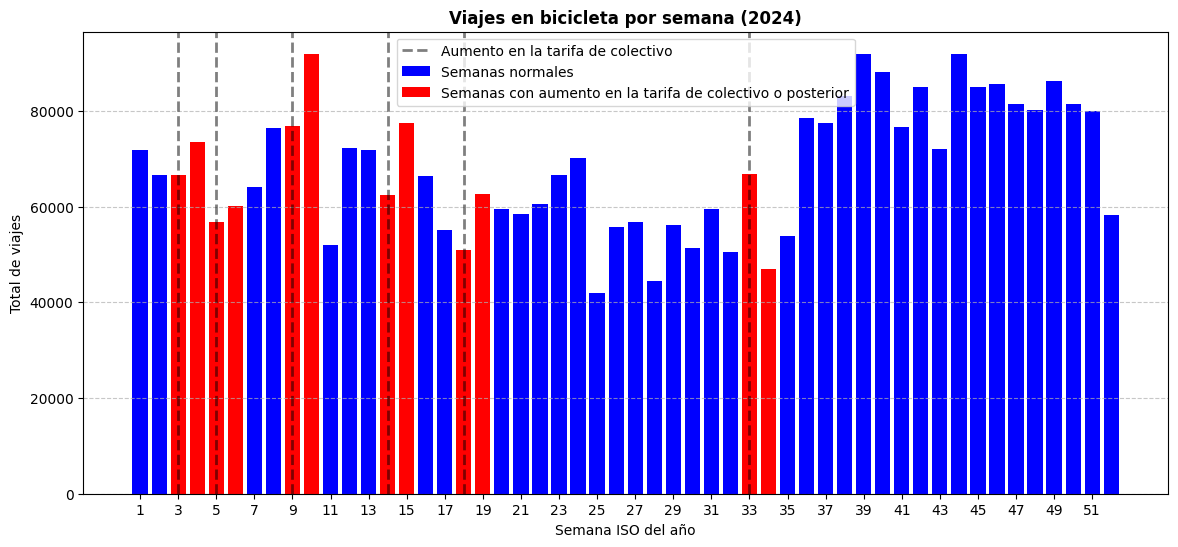

In [42]:
# Semanas en que se anunciaron/aumentaron tarifas
semanas_aumento = fechas_aumento_series.dt.isocalendar().week
print(semanas_aumento)

semanas_destacadas = []
for semana in semanas_aumento:
    semanas_destacadas.append(semana)
    semanas_destacadas.append(semana + 1)
print(semanas_destacadas)
df_frecuencia['semana_destacada'] = df_frecuencia['semana_iso'].isin(semanas_destacadas)


# Función para comparar el uso alrededor de una fecha de aumento
def analizar_aumento(semana_iso, df):
    semana_post = semana_iso + 1
    
    promedio_act = df[df['semana_iso'] == semana_iso]['count'].mean()
    promedio_post = df[df['semana_iso'] == semana_post]['count'].mean()
    
    return promedio_act, promedio_post

for semana in semanas_aumento:
    promedio_act, promedio_post = analizar_aumento(semana, df_frecuencia)
    print(f"\nSemana {semana} (actual): {promedio_act:.0f} viajes")
    print(f"Semana {semana + 1} (posterior): {promedio_post:.0f} viajes")
    print(f"Aumento porcentual en semana {semana}: {(promedio_post - promedio_act)/promedio_act*100}")

viajes_por_semana = df_frecuencia.groupby(['semana_iso', 'semana_destacada'])['count'].sum().reset_index()
plt.figure(figsize=(14, 6))

# Barras normales (azul)
plt.bar(
    viajes_por_semana[~viajes_por_semana['semana_destacada']]['semana_iso'],
    viajes_por_semana[~viajes_por_semana['semana_destacada']]['count'],
    color='blue',
    label='Semanas normales'
)

# Barras destacadas (rojo)
plt.bar(
    viajes_por_semana[viajes_por_semana['semana_destacada']]['semana_iso'],
    viajes_por_semana[viajes_por_semana['semana_destacada']]['count'],
    color='red',
    label='Semanas con aumento en la tarifa de colectivo o posterior'
)

# Añadir líneas verticales para las semanas de aumento
for i, semana in enumerate(semanas_aumento):
    if i == 0:
        plt.axvline(x=semana, color='black', linestyle='--', alpha=0.5, linewidth=2, label='Aumento en la tarifa de colectivo')
    else:
        plt.axvline(x=semana, color='black', linestyle='--', alpha=0.5, linewidth=2)

# Personalizar gráfico
plt.title('Viajes en bicicleta por semana (2024)', fontweight='bold')
plt.xlabel('Semana ISO del año')
plt.ylabel('Total de viajes')
plt.xticks(range(1, 53, 2))  # Mostrar semanas pares para mejor legibilidad
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Se resumen los resultados obtenidos en la siguiente tabla:

<table>
  <tr><th>Semana de Aumento (Actual)</th><th>Semana Posterior</th><th>Viajes (Actual)</th><th>Viajes (Posterior)</th><th>Aumento Porcentual</th></tr>
  <tr><td>3</td><td>4</td><td>9.512</td><td>10.512</td><td>+10,52%</td></tr>
  <tr><td>5</td><td>6</td><td>8.122 </td><td>8.578</td><td>+5,61%</td></tr>
  <tr><td>9</td><td>10</td><td>10.986</td><td>13.131</td><td>+19,52%</td></tr>
  <tr><td>14</td><td>15</td><td>8.908</td><td>11.084</td><td>+24,44%</td></tr>
  <tr><td>18</td><td>19</td><td>7.267</td><td>8.946</td><td>+23,10%</td></tr>
  <tr><td>33</td><td>34</td><td>9.554</td><td>6.720</td><td>-29,66%</td></tr>
  <tr><td colspan="4"><strong>Aumento promedio</strong></td><td><strong>+9.09%</strong></td></tr>
</table>

De modo que parece haber una tendencia a utilizar más el servicio de Ecobicis cuando se anuncia un aumento en la tarifa del colectivo, a excepción del mes de agosto. De todos modos es necesario evaluar más factores antes de afirmar con rotundidad que los aumentos se producen a causa del anuncio de aumentos.